In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
# Step 1: Read the CSV File
data = pd.read_csv('sales_data.csv')
data

,Product Name,Date,Quantity,Net Pay
0,Calligraphy Paper Set,16/11/2024,4,20420.0
1,Tom Ford Sunglasses,04/08/2024,24,11760.0
2,Yoga Mat,03/10/2024,48,223680.0
3,Bluetooth Speaker,03/10/2024,9,38430.0
4,Yoga Mat,03/10/2024,10,30020.0
...,...,...,...,...
277,Golf Clubs,01/09/2024,35,224875.0
278,Tennis Ball Set,01/09/2024,4,181496.0
279,Football,25/10/2024,4,134268.0
280,Sports Shorts,25/10/2024,51,2703816.0


In [4]:
# Step 2: Data Cleaning and Formatting
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [5]:
# Step 3: One-Hot Encode the Product Name
data_encoded = pd.get_dummies(data, columns=['Product Name'], prefix='Product Name')

In [6]:
# Step 4: Prepare Features and Targets
X = data_encoded.drop(columns=['Date', 'Quantity', 'Net Pay'])
y = data_encoded[['Net Pay', 'Quantity']]


In [7]:
# Step 5: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 6: Train a Multi-Output Regressor
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [9]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

In [10]:
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: [8.45864094e+11 5.02342785e+02]
R2 Score: [-0.2715149  -0.21447004]


In [11]:
monthly_data = data.groupby(data['Date'].dt.to_period("M")).agg({
    'Quantity': 'sum',
    'Net Pay': 'sum'
}).reset_index()
monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()

In [12]:
product_monthly_data = data.groupby([data['Date'].dt.to_period("M"), 'Product Name']).agg({
    'Quantity': 'sum',
    'Net Pay': 'sum'
}).reset_index()
product_monthly_data['Date'] = product_monthly_data['Date'].dt.to_timestamp()

In [13]:
top_products = data.groupby('Product Name').agg({
    'Quantity': 'sum',
    'Net Pay': 'sum'
}).sort_values('Net Pay', ascending=False).reset_index()

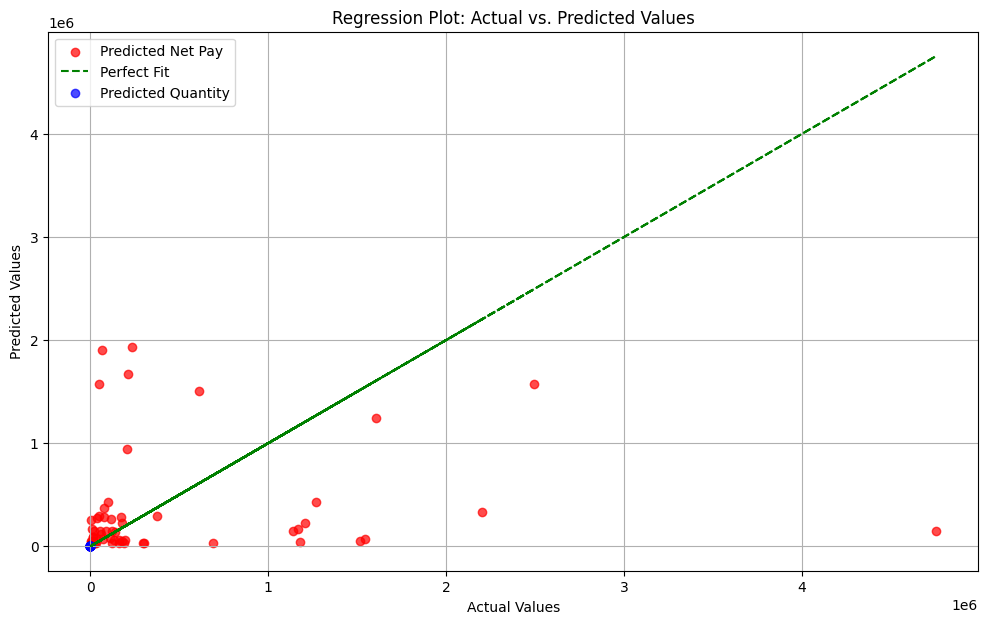

In [14]:
reg=RandomForestRegressor(random_state=42)
reg.fit(X_train,y_train)
# Make predictions on the test set
y_pred = reg.predict(X_test)

# Convert predictions and actual values to DataFrames for plotting
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# Plotting predicted vs. actual values for 'Net Pay' and 'Quantity'
plt.figure(figsize=(12, 7))

# Regression plot for Net Pay
plt.scatter(y_test['Net Pay'], y_pred_df['Net Pay'], color='red', label='Predicted Net Pay', alpha=0.7)
plt.plot(y_test['Net Pay'], y_test['Net Pay'], color='green', label='Perfect Fit', linestyle='--')

# Regression plot for Quantity
plt.scatter(y_test['Quantity'], y_pred_df['Quantity'], color='blue', label='Predicted Quantity', alpha=0.7)

# Labels, legend, and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



C:\Users\Syscom\AppData\Local\Temp\ipykernel_6544\3588870336.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Date', y='Quantity', data=monthly_data, palette='viridis')


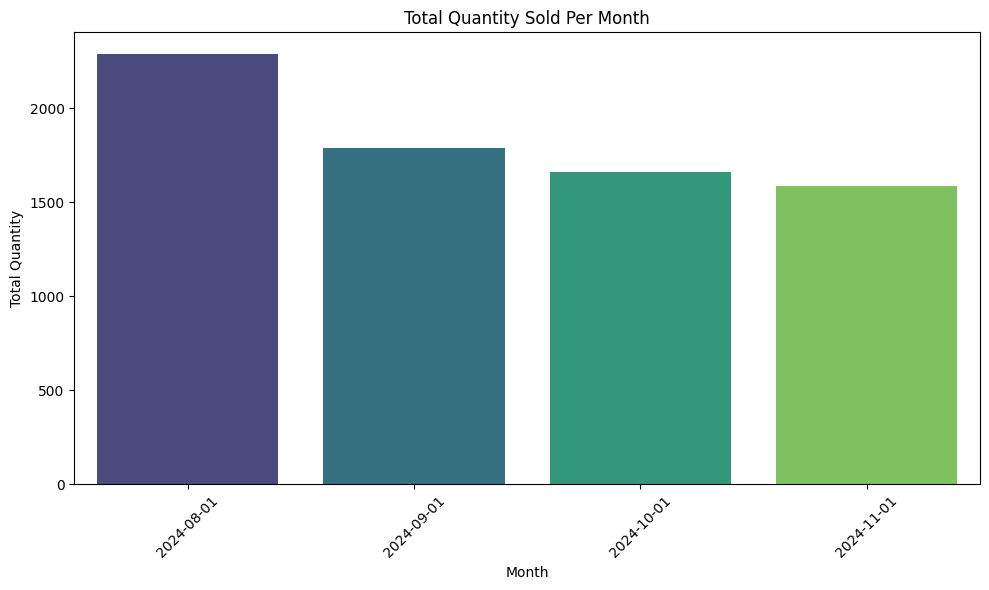

In [15]:
# Step 9: Visualizations

# Visualization 1: Monthly Total Quantity Sold
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Quantity', data=monthly_data, palette='viridis')
plt.title('Total Quantity Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

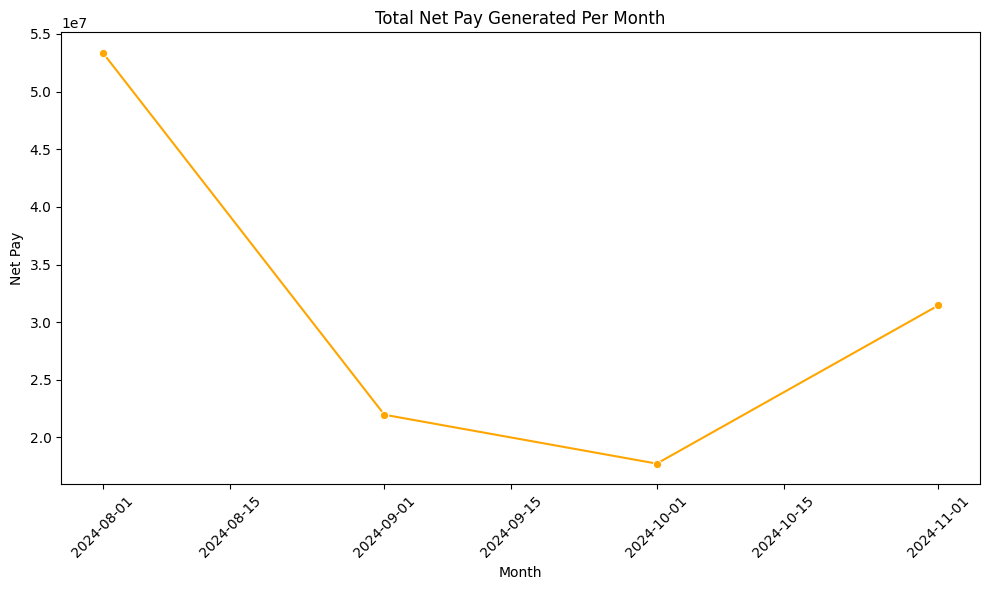

In [16]:
# Visualization 2: Monthly Total Net Pay Generated
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Net Pay', data=monthly_data, marker='o', color='orange')
plt.title('Total Net Pay Generated Per Month')
plt.xlabel('Month')
plt.ylabel('Net Pay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Syscom\AppData\Local\Temp\ipykernel_6544\2935482789.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


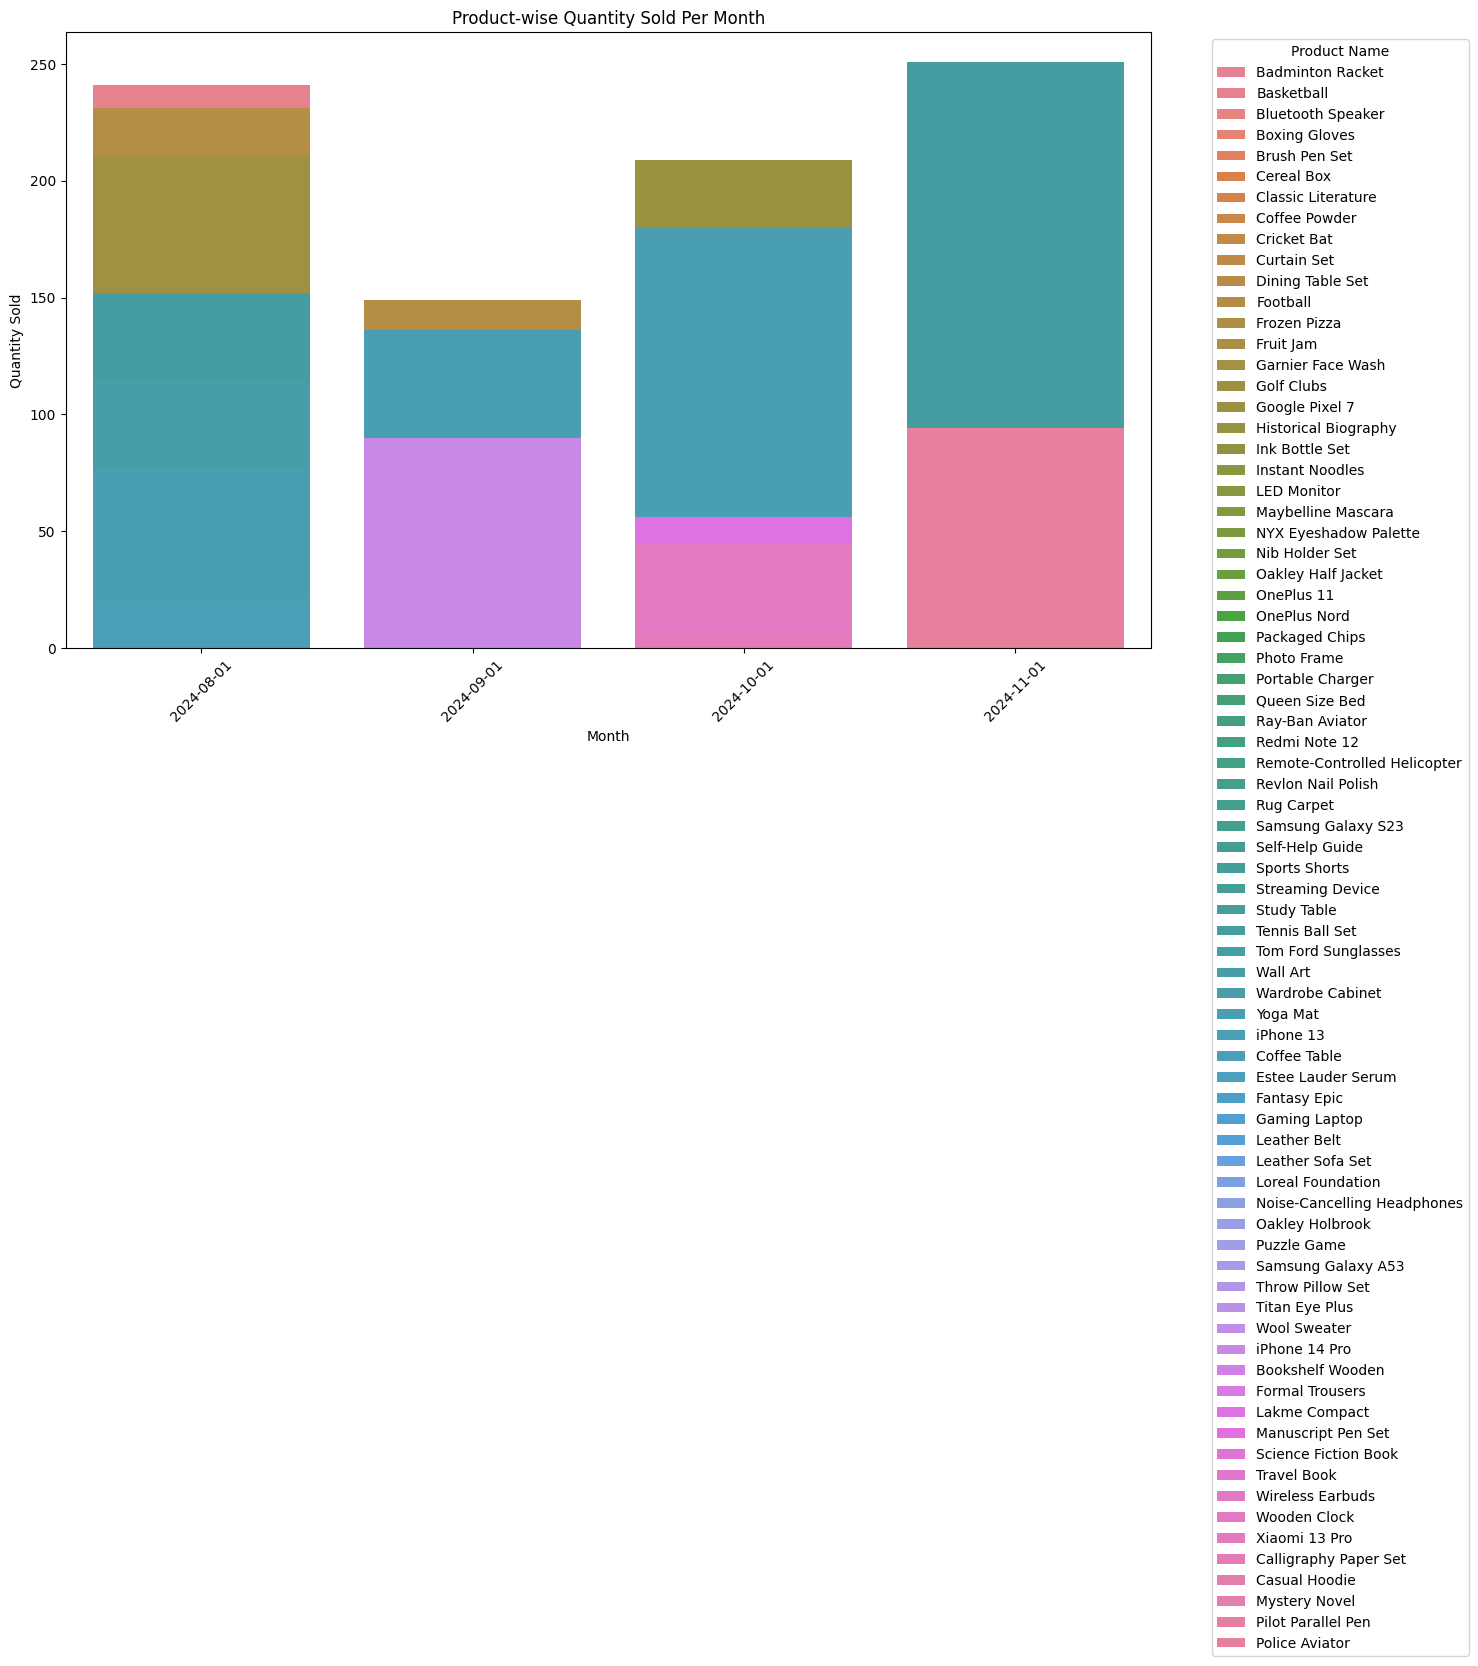

In [17]:
# Visualization 3: Product-Wise Quantity Sold Per Month
plt.figure(figsize=(14, 8))
sns.barplot(x='Date', y='Quantity', hue='Product Name', data=product_monthly_data, dodge=False)
plt.title('Product-wise Quantity Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Syscom\AppData\Local\Temp\ipykernel_6544\1831497645.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


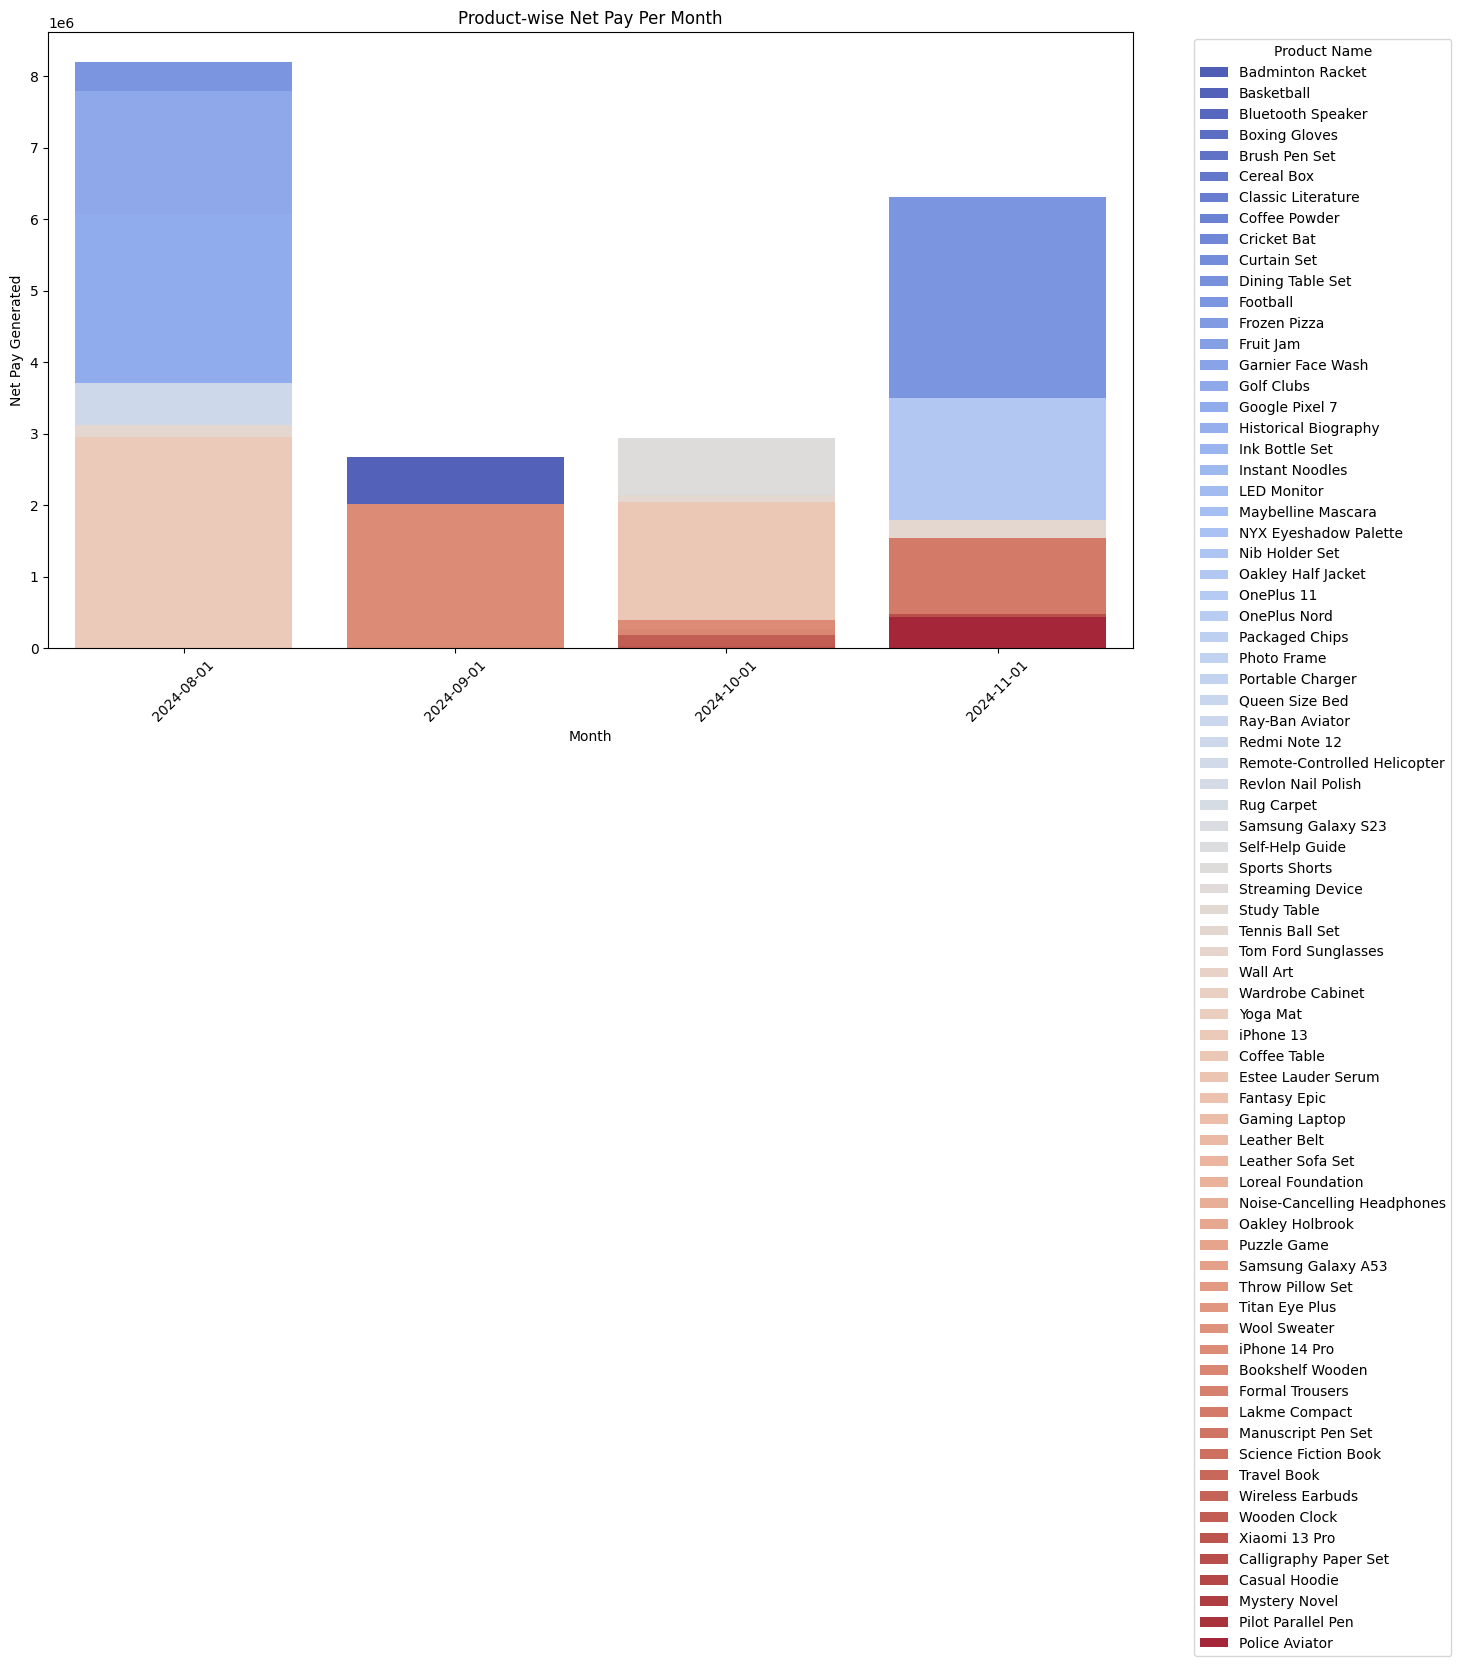

In [18]:
# Visualization 4: Product-Wise Net Pay Per Month
plt.figure(figsize=(14, 8))
sns.barplot(x='Date', y='Net Pay', hue='Product Name', data=product_monthly_data, dodge=False, palette='coolwarm')
plt.title('Product-wise Net Pay Per Month')
plt.xlabel('Month')
plt.ylabel('Net Pay Generated')
plt.xticks(rotation=45)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Syscom\AppData\Local\Temp\ipykernel_6544\3225953056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Product Name', x='Net Pay', data=top_10_products, palette='magma')


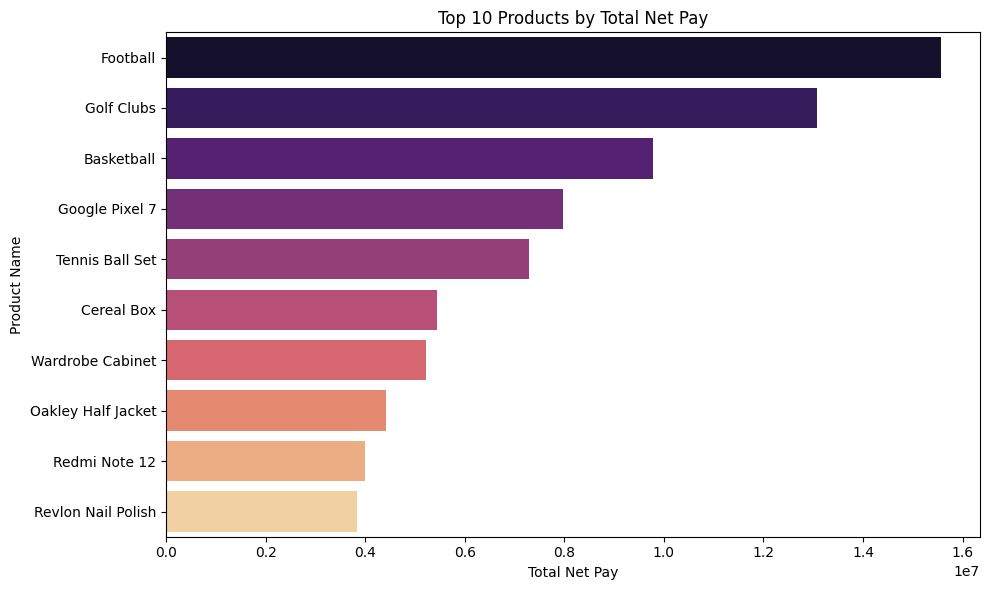

In [19]:
# Visualization 5: Top 10 Products by Total Net Pay
top_10_products = top_products.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y='Product Name', x='Net Pay', data=top_10_products, palette='magma')
plt.title('Top 10 Products by Total Net Pay')
plt.xlabel('Total Net Pay')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [20]:
import pickle
import pandas as pd

# Save the regression model
with open('regression_model.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)

# Save X_train and y_train as CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# Save X_test and y_test as CSV files for prediction purposes
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
